In [ ]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [ ]:
df = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [ ]:
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Classificacao.value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

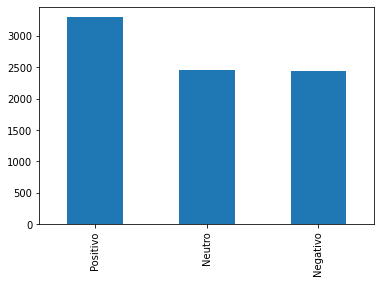

In [ ]:
%matplotlib inline
df.Classificacao.value_counts().plot(kind='bar')

In [ ]:
df.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [ ]:
df.drop_duplicates(['Text'], inplace=True)

In [ ]:
df.Text.count()

5765

In [ ]:
tweets = df['Text']
classes = df['Classificacao']

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def PreprocessamentoSemStopWords(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace(',','').replace('.','').replace(';','').replace('-','').replace('?','').replace('!','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))    

In [ ]:
PreprocessamentoSemStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'gosto partido votaria novamente nesse governante'

In [ ]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet_tokenizer = TweetTokenizer()

In [ ]:
frase = 'Investimento em estudo é algo importante a se fazer'

In [ ]:
tweet_tokenizer.tokenize(frase)

['Investimento', 'em', 'estudo', 'é', 'algo', 'importante', 'a', 'se', 'fazer']

In [ ]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

In [ ]:
freq_tweets =vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [ ]:
freq_tweets.shape

(5765, 13362)

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet_tokenizer = TweetTokenizer()

In [ ]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [ ]:
testes = ['Esse governo está no início, vamos ver o que vai dar','Estou muito feliz com o governo de Minas esse ano','O estado de Minas Gerais decretou calamidade financeira!!!','A segurança desse país está deixando a desejar','O governador de Minas é do PT']

In [ ]:
tl = pd.read_json('tweets_limpos.json',orient = 'records', dtype={"created_at":int, "tweet":str, "cleaned_tweets":str, "user_id":str})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
tweetsLimpos = tl['cleaned_tweets']

In [ ]:
freq_testes = vectorizer.transform(tweetsLimpos)

In [ ]:
# freq_testes = vectorizer.transform(testes)

In [ ]:
modelo.predict(freq_testes)

array(['Neutro', 'Positivo', 'Neutro', 'Negativo', 'Neutro', 'Neutro',
       'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Negativo',
       'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Negativo',
       'Negativo', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Negativo',
       'Negativo', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Positivo', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Positivo'], dtype='<U8')

In [ ]:
tl['sentimento'] = modelo.predict(freq_testes)

In [ ]:
tl

,created_at,user_id,tweet,preprocessed,cleaned_tweets,sentimento
0,1664126228000000000,1574085607831257088,@ThiagoS84284297 @arenasantoreis @DaniloGentil...,@thiagos84284297 @arenasantoreis @danilogentil...,thiagos84284297 arenasantoreis danilogentil...,Neutro
1,1664126221000000000,1574085578424926208,hj no ponto de ônibus enquanto esperava o ônib...,hj ponto ônibus enquanto esperava ônibus ouvin...,hj ponto ônibus enquanto esperava ônibus ouvin...,Positivo
2,1664126204000000000,1574085506052214784,Um dia chegará na msm moeda (se n já chegou) e...,dia chegará msm moeda n chegou vou adorar assi...,dia chegará msm moeda n chegou vou adorar assi...,Neutro
3,1664126134000000000,1574085211633360896,"raramente achei dinheiro na rua, um dia vi uma...",raramente achei dinheiro rua dia vi pessoa dei...,raramente achei dinheiro rua dia vi pessoa dei...,Negativo
4,1664126097000000000,1574085056783597568,RT @draugustonasser: “(...) Não se podia compr...,@draugustonasser “ podia comprar tempo única m...,draugustonasser podia comprar tempo única m...,Neutro
5,1664126037000000000,1574084806756950016,RT @frajolin: esse é o frajola teve obstrução ...,@frajolin frajola obstrução urinária passar 2 ...,frajolin frajola obstrução urinária passar 2 ...,Neutro
6,1664126035000000000,1574084799484010496,"RT @lemonapp_br: Se falamos de blockchain, $BU...",@lemonapp_br falamos blockchain $busd token er...,lemonapp br falamos blockchain busd token er...,Neutro
7,1664126035000000000,1574084799391834112,@Wess101088 @tesoureiros 51 imoveis que foram ...,@wess101088 @tesoureiros 51 imoveis moeda corr...,wess101088 tesoureiros 51 imoveis moeda corr...,Negativo
8,1664126031000000000,1574084778839580672,Vou pagar na mesma moeda até a pessoa se senti...,vou pagar mesma moeda pessoa sentir mal,vou pagar mesma moeda pessoa sentir mal,Neutro
9,1664126007000000000,1574084682269892608,"@diogo_rossi ai sim,eu não manjo muito de como...",@diogo_rossi ai simeu manjo moeda dolar bem es...,diogo rossi ai simeu manjo moeda dolar bem es...,Neutro


In [ ]:
import json
tl.iloc[:50].to_json('tweets_sentimentos.json', orient = 'records')

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8664353859496965

In [ ]:
print(metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974
    Positivo       0.96      0.88      0.91      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       846     100         5   951
Neutro         206    1656       112  1974
Positivo        53     294      2493  2840
All           1105    2050      2610  5765


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8702515177797051

In [ ]:
print(metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.70      0.92      0.79       951
      Neutro       0.85      0.84      0.84      1974
    Positivo       0.97      0.88      0.92      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.88      0.85      5765
weighted avg       0.88      0.87      0.87      5765



In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       875      76         0   951
Neutro         252    1651        71  1974
Positivo       126     223      2491  2840
All           1253    1950      2562  5765
